In [5]:
from random import random, randint
import numpy as np 
from math import *

from scipy.integrate import *
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(precision=3)
%matplotlib inline

N = 100000
t_greed = np.linspace(0,1000,N)
#p0x0 = [0., 0., 0., 0., 0., 0.] #начальные данные
p0x0 = np.random.random(6) #начальные данные
print p0x0

[ 0.857  0.627  0.827  0.548  0.256  0.453]


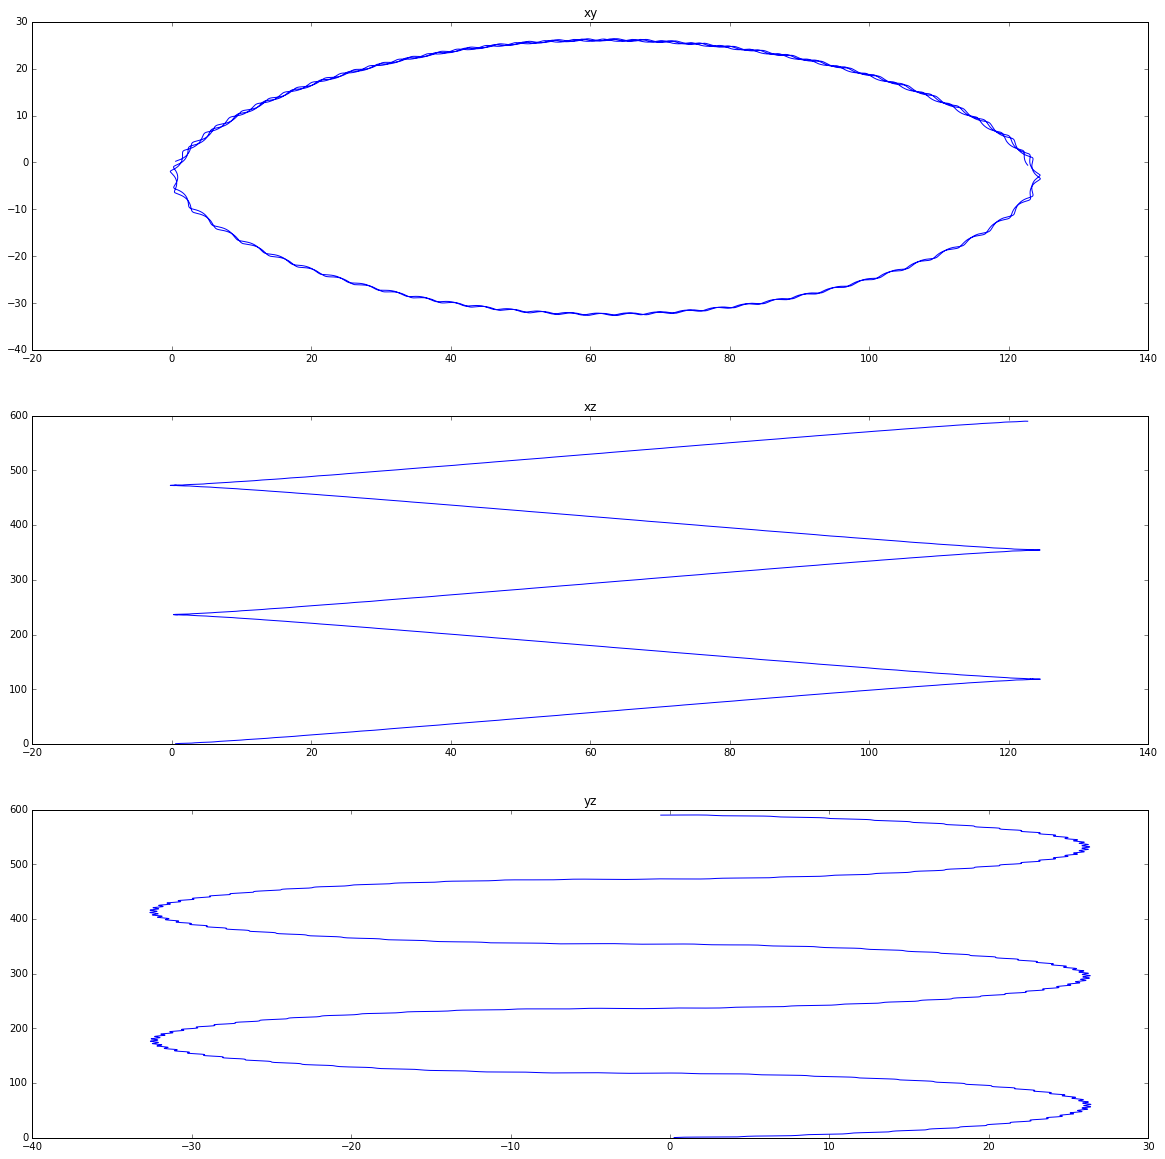

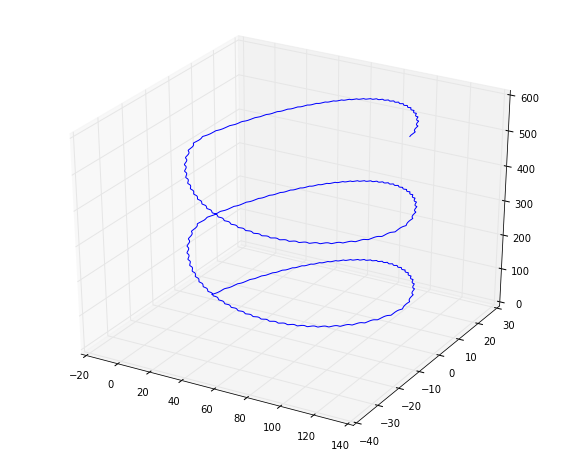

In [7]:
#Случай3. Плоская волна с эллиптической поляризацией (разность фаз phi):
#E = E0*cos( (kr) - omega*t), B = B0*sin( (kr) - omega*t);  k = (0, 0, k)
E = 1
B = 1.
omega = 1
phi = pi/2
k = np.array([0, 0, 1])

def equations(x,t, E, B, k, phi):
    # Первые три - уравнения для импульсов, последние для координат
    return [E*cos(omega*t) + B*cos(omega*t)*x[2]/sqrt(1. + np.dot(x[:3], x[:3])),\
            E*sin(omega*t) + B*sin(omega*t)*x[2]/sqrt(1. + np.dot(x[:3], x[:3])),\
            (-B*sin(omega*t)*x[1] + B*cos(omega*t)*x[0])/sqrt(1. + np.dot(x[:3], x[:3])),\
            x[0]/sqrt(1. + np.dot(x[:3], x[:3])),x[1]/sqrt(1. + np.dot(x[:3], x[:3])),\
            x[2]/sqrt(1. + np.dot(x[:3], x[:3]))]


solution = odeint(lambda x, y: equations(x, y, E, B, k, phi), p0x0, t_greed)

figure(figsize=(20, 20))
# !!! 3 строки, 1 столбец
# !!! Текущая ячейка - 1
subplot (3, 1, 1)
plot(solution[:, 3], solution[:, 4])
title ("xy")
savefig('fooXY.png')

subplot (3, 1, 2)
plot(solution[:, 3], solution[:, 5])
title ("xz")
savefig('fooXZ.png')

subplot (3, 1, 3)
plot(solution[:, 4], solution[:, 5])
title ("yz")
savefig('fooYZ.png')

#print solution[:, 3]
fig3d = plt.figure(figsize=(10,8))
ax = fig3d.gca(projection='3d')
ax.plot(solution[:, 3], solution[:, 4], solution[:, 5])

savefig('foo.png')